### EDA/Preprocessing household_power_consumption.csv

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk

In [52]:
df = pd.read_csv('core\static\data\household_power_consumption.csv', sep=';',
                parse_dates={'Datetime' : ['Date', 'Time']}, infer_datetime_format=True,
                low_memory=False)
df.info()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\oscar\AppData\Local\Temp\ipykernel_5108\3678932487.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('core\static\data\household_power_consumption.csv', sep=';',
C:\Users\oscar\AppData\Local\Temp\ipykernel_5108\3678932487.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('core\static\data\household_power_consumption.csv', sep=';',
C:\Users\oscar\AppData\Local\Temp\ipykernel_5108\3678932487.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('core\static\data\household_power_consumption.csv',

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Datetime               datetime64[ns]
 1   Global_active_power    object        
 2   Global_reactive_power  object        
 3   Voltage                object        
 4   Global_intensity       object        
 5   Sub_metering_1         object        
 6   Sub_metering_2         object        
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 126.7+ MB


C:\Users\oscar\AppData\Local\Temp\ipykernel_5108\3678932487.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('core\static\data\household_power_consumption.csv', sep=';',


- 2   Global_active_power    object 
- 3   Global_reactive_power  object 
- 4   Voltage                object 
- 5   Global_intensity       object 
- 6   Sub_metering_1         object 
- 7   Sub_metering_2         object 


These are all object but need to be floats so let's change them to float64

In [53]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [54]:
df.shape

(2075259, 8)

In [55]:
df.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [56]:
df.isnull().sum()

Datetime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [57]:
# fill missing values
df.ffill(axis=0,inplace=True)
df.isnull().sum().sum()

0

## visualisation

In [58]:
#sns.pairplot(df)

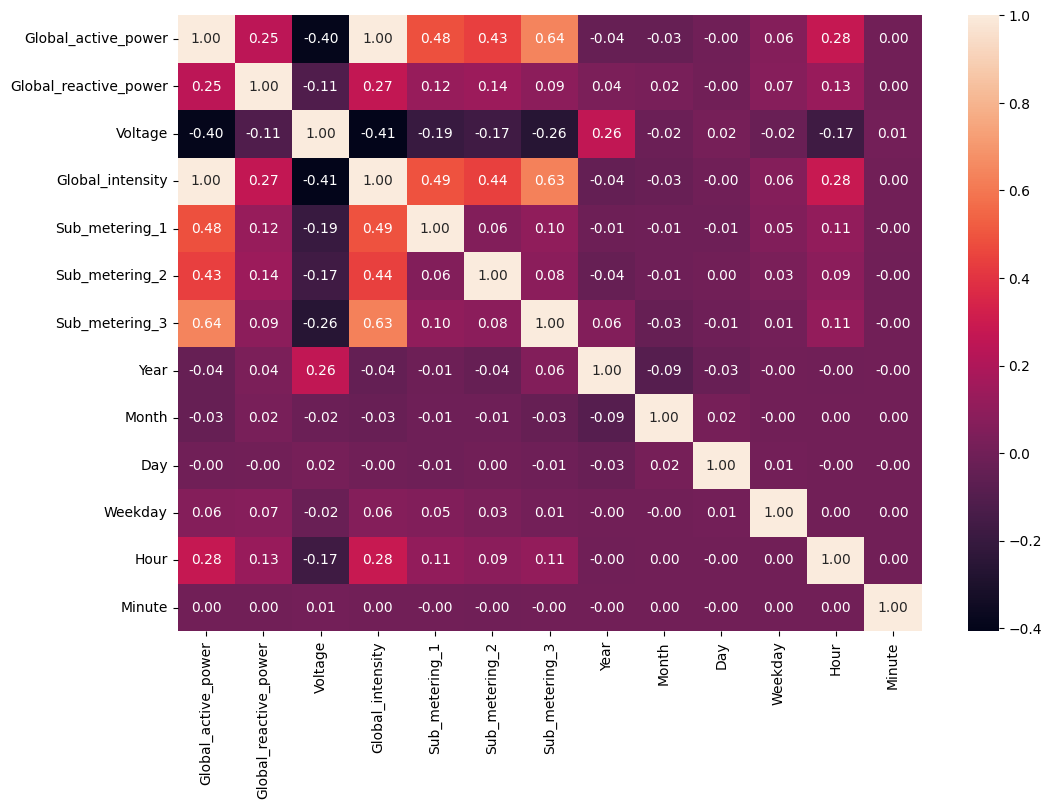

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Day,Weekday,Hour,Minute
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,5,17,24
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,5,17,25
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,5,17,26
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,5,17,27
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,5,17,28


In [59]:
df_datetime = df.copy()

df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Weekday'] = df['Datetime'].dt.weekday  # monday=0, sunday=6
df['Hour'] = df['Datetime'].dt.hour
df['Minute'] = df['Datetime'].dt.minute

df.drop('Datetime', axis=1, inplace=True)

correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()
df.head()

In [60]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
tri_df = correlation_matrix.mask(mask)

corr_pairs = tri_df.unstack().sort_values(ascending=False)
high_corr_pairs = corr_pairs[corr_pairs > 0.0]
print("All correlations:")
print(high_corr_pairs)

All correlations:
Global_active_power    Global_intensity         0.998884
                       Sub_metering_3           0.639681
Global_intensity       Sub_metering_3           0.627569
                       Sub_metering_1           0.489283
Global_active_power    Sub_metering_1           0.484388
Global_intensity       Sub_metering_2           0.440359
Global_active_power    Sub_metering_2           0.434581
Global_intensity       Hour                     0.280122
Global_active_power    Hour                     0.279743
Global_reactive_power  Global_intensity         0.265558
Voltage                Year                     0.257956
Global_active_power    Global_reactive_power    0.246362
Global_reactive_power  Sub_metering_2           0.139438
                       Hour                     0.126429
                       Sub_metering_1           0.123135
Sub_metering_3         Hour                     0.113233
Sub_metering_1         Hour                     0.107944
             

In [61]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pandas as pd

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Year', 'Month', 'Day', 'Weekday', 'Hour']])
X_scaled = sm.add_constant(X_scaled)  # Add constant after scaling

# Check VIF to identify multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = ['const'] + ['Year', 'Month', 'Day', 'Weekday', 'Hour']
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print(vif_data)

# Assuming no multicollinearity or after addressing it, fit the model
y = df['Global_active_power']
model = sm.OLS(y, X_scaled, missing='drop').fit()
print(model.summary())

   feature       VIF
0    const  1.000000
1     Year  1.008743
2    Month  1.008346
3      Day  1.001175
4  Weekday  1.000062
5     Hour  1.000001
                             OLS Regression Results                            
Dep. Variable:     Global_active_power   R-squared:                       0.085
Model:                             OLS   Adj. R-squared:                  0.085
Method:                  Least Squares   F-statistic:                 3.851e+04
Date:                 Tue, 11 Jun 2024   Prob (F-statistic):               0.00
Time:                         00:48:29   Log-Likelihood:            -2.9601e+06
No. Observations:              2075259   AIC:                         5.920e+06
Df Residuals:                  2075253   BIC:                         5.920e+06
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t

In [62]:
# save dataframe to new processed csv
df.to_csv('core\static\data\household_power_consumption_processed.csv', index=False)
df_datetime.to_csv('core\static\data\household_power_consumption_datetime_processed.csv', index=False)

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\oscar\AppData\Local\Temp\ipykernel_5108\2916362075.py:2: SyntaxWarning: invalid escape sequence '\s'
  df.to_csv('core\static\data\household_power_consumption_processed.csv', index=False)
C:\Users\oscar\AppData\Local\Temp\ipykernel_5108\2916362075.py:3: SyntaxWarning: invalid escape sequence '\s'
  df_datetime.to_csv('core\static\data\household_power_consumption_datetime_processed.csv', index=False)
